### To print the elapsed time, first get the start time

In [1]:
import time
from datetime import timedelta
from pprint   import pprint
start_time = time.time()

In [2]:
import pandas                  as     pd
import numpy                   as     np
import seaborn                 as     sns
import matplotlib.pyplot       as     plt
import statsmodels.api         as     sm
from   sklearn.model_selection import train_test_split
from   sklearn.metrics         import confusion_matrix, classification_report
import sys, os

In [3]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

import sys
print(sys.version)

print("statsmodels version {}".format(sm.__version__))

1.2.2
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
statsmodels version 0.14.0


### Define useful  functions

In [4]:
"""
Created on Sat Aug  4 16:06:29 2018

@author: PVS

@description: This file holds functions for building models 

"""
"""    
1)   Function name: draw_cm
    
     Description: This function does the following:
         
                  Plots a heat graph for confusion matrix 
     Input:
            1) Data Frame containing actual values
     
            2) Data frame containing predicted values
    
    
     Output:
            1) a nice confusion matrix graph      

"""

def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

### -----------------------------------------------------------------------------------------------------------------------------    

"""
2)   Function name: draw_roc
    
     Description: This function does the following:
                  i) plots a ROC and reports the area under ROC for the specified input
     Input:
          1) Data Frame containing actual values for the target variable
    
          2) Data frame containing predicted probabilities
    
    
     Output:
          1) a nice ROC graph with AUROC mentioned     

"""

def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

### -----------------------------------------------------------------------------------------------------------------------------

In [5]:
"""
3)  Function name: get_significant_vars
        
    Description: This function lists the significant variables at the specified significance level from the coefficients table

    Input:
      1) Fitted model
    
      2) Desired Level of significance
    
    Output:
      1) List of significant variables at the desired level of significance        

"""
def get_significant_vars( lm, sig_level ):
    
    import pandas as pd
    
    var_p_vals_df         = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    
    return list( var_p_vals_df[var_p_vals_df.pvals <= sig_level]['vars'] )

### -----------------------------------------------------------------------------------------------

In [6]:
def  build_LR(model, X_tr, Y_tr, X_te, Y_te, tex):
    print(tex)
    ###
    ### Build the base model ###
    ###
    pprint(model.get_params())
    model.fit(X_tr,Y_tr)
    ###
    #use model to make predictions on train data
    ###
    tr_y_pred     =   model.predict(X_tr)
    tr_matrix     =   confusion_matrix(Y_tr, tr_y_pred)
    print("\nTraining Data \n Confusion Matrix")
    print(tr_matrix)
    draw_cm(Y_tr, tr_y_pred)
    print(classification_report(Y_tr, tr_y_pred, zero_division = 1, digits = 6))
    ###
    #use model to make predictions on test data
    ###
    te_y_pred     =   model.predict(X_te)
    te_matrix     =   confusion_matrix(Y_te, te_y_pred)
    print("\nTest Data \n Confusion Matrix")
    print(te_matrix)
    draw_cm(Y_te, te_y_pred)
    print(classification_report(Y_te, te_y_pred, zero_division = 1, digits = 6))   


In [7]:
import  os

folder =  r'F:\DSE-Capstone\2023-Oct\DSE-FT-Pune-Aug23-G2\Data'

### folder =  r'H:\DSE-Capstone\2023-Oct\DSE-FT-Pune-Aug23-G2\Data'

os.chdir(folder)

In [8]:
filename = 'Cleaned_housing_loan_data.csv'

In [9]:
df_imp =  pd.read_csv(filename, encoding = 'Latin-1')
print("\nDimension {}".format(df_imp.shape))
print("\nColumns {}".format(df_imp.columns))


Dimension (307511, 16)

Columns Index(['AMT_ANNUITY', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'PA_AMT_CREDIT_sum',
       'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min',
       'IP_AMT_INSTALMENT_sum', 'IP_AMT_INSTALMENT_avg',
       'AT_CREDIT_INCOME_PERCENT', 'AT_ANNUITY_INCOME_PERCENT',
       'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT', 'TARGET'],
      dtype='object')


In [10]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   AMT_ANNUITY                307511 non-null  float64
 1   DAYS_BIRTH                 307511 non-null  int64  
 2   DAYS_REGISTRATION          307511 non-null  float64
 3   DAYS_ID_PUBLISH            307511 non-null  int64  
 4   EXT_SOURCE_2               307511 non-null  float64
 5   EXT_SOURCE_3               307511 non-null  float64
 6   PA_AMT_CREDIT_sum          307511 non-null  float64
 7   PA_DAYS_DECISION_max_y     307511 non-null  float64
 8   IP_DAYS_INSTALMENT_min     307511 non-null  float64
 9   IP_AMT_INSTALMENT_sum      307511 non-null  float64
 10  IP_AMT_INSTALMENT_avg      307511 non-null  float64
 11  AT_CREDIT_INCOME_PERCENT   307511 non-null  float64
 12  AT_ANNUITY_INCOME_PERCENT  307511 non-null  float64
 13  AT_CREDIT_TERM             30

### Performance measure for this project

In the context of predicting whether a user will default on housing loan or not, both precision and recall are useful.

However, which one to prioritize depends on the business objective. If the goal is to minimize false positives (i.e., users who are predicted to default but do not), then precision is more important.

On the other hand, if the goal is to minimize false negatives (i.e., users who are predicted not to default but do), then recall is more important.

We shall use recall as our measure of model performance since the cost of false negatives is quite high when compared to the cost of false positives.

The following variables have VIF less than 5 and selected for building logistic regression model:
1. DAYS_REGISTRATION
2. DAYS_ID_PUBLISH
3. PA_AMT_CREDIT_sum
4. PA_DAYS_DECISION_max_y
5. IP_DAYS_INSTALMENT_min
6. IP_AMT_INSTALMENT_avg
7. AT_CREDIT_INCOME_PERCENT
8. AT_CREDIT_TERM
9. AT_DAYS_EMPLOYED_PERCENT

Of course, we need add the target variable to our model.

In [11]:
impvars =  ['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'PA_AMT_CREDIT_sum','PA_DAYS_DECISION_max_y',\
            'IP_DAYS_INSTALMENT_min','IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT',\
            'AT_CREDIT_TERM','AT_DAYS_EMPLOYED_PERCENT']

In [12]:
X_names    = impvars

In [13]:
X = df_imp.loc[:, impvars]
y = df_imp["TARGET"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.3, random_state = 101,stratify = y)


### Check the proportion of classes in the target variable, TARGET

In [14]:
### Full data ------ 
### ----------------
print("\nFull data: Proportion of classes {}".format(y.value_counts(normalize = True)))
### Training data ---
### -----------------
print("Y Training data: Proportion of classes {}".format(y_train.value_counts(normalize = True)))
### Test data ---
### -----------------
print("Y Test data: Proportion of classes {}".format(y_test.value_counts(normalize = True)))
### -----------------------------------------------------------------------------------------------


Full data: Proportion of classes TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64
Y Training data: Proportion of classes TARGET
0    0.919273
1    0.080727
Name: proportion, dtype: float64
Y Test data: Proportion of classes TARGET
0    0.919266
1    0.080734
Name: proportion, dtype: float64


### Build a logistic regression model 

* Both statsmodels and scikit-learn can be used for building a logistic regression model.

* Statsmodels can be used to explore and understand the underlying patterns and relationships in the data, while Scikit-learn can be used to build and evaluate predictive models. Both Statsmodels and Scikit-learn are masters in their respective domains and can help uncover the secrets hidden within your data.

* Scikit-learn is most commonly used in machine learning and data science. StatsModels is used in the field of econometrics, generalised-linear models, time-series-analysis, and regression models. 


In [15]:
logit = sm.Logit(y_train, sm.add_constant( X_train ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.276589
         Iterations 7


**Terminated successfully** *means that the numerical optimization converged on a solution and is not still bouncing around, trying to find a solution.*

### Using sklearn model

Using default parameters
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 3000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Training Data 
 Confusion Matrix
[[197870     10]
 [ 17373      4]]


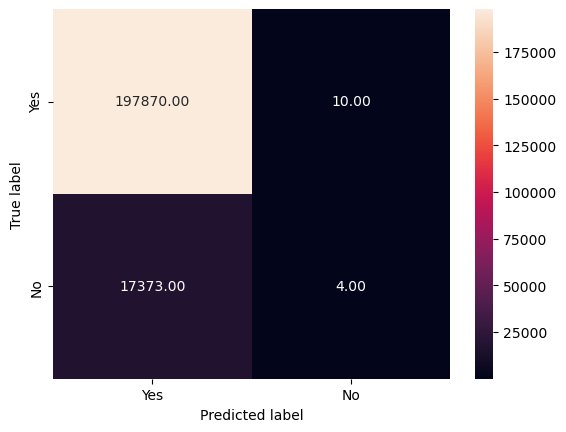

              precision    recall  f1-score   support

           0   0.919287  0.999949  0.957923    197880
           1   0.285714  0.000230  0.000460     17377

    accuracy                       0.919245    215257
   macro avg   0.602500  0.500090  0.479191    215257
weighted avg   0.868140  0.919245  0.880630    215257


Test Data 
 Confusion Matrix
[[84804     2]
 [ 7446     2]]


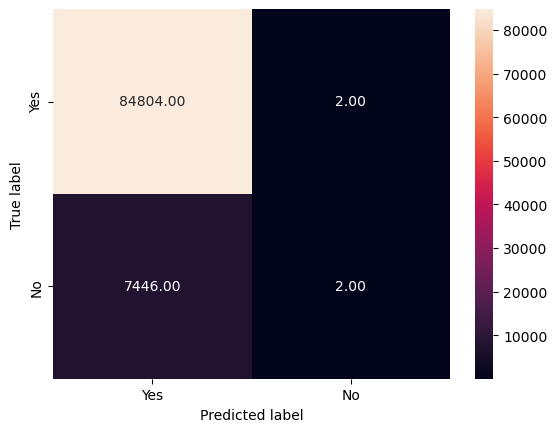

              precision    recall  f1-score   support

           0   0.919285  0.999976  0.957934     84806
           1   0.500000  0.000269  0.000537      7448

    accuracy                       0.919266     92254
   macro avg   0.709642  0.500122  0.479235     92254
weighted avg   0.885434  0.919266  0.880640     92254



In [16]:
from sklearn.linear_model  import  LogisticRegression
tex      =  "Using default parameters"
model    =  LogisticRegression(max_iter = 3000)
build_LR(model, X_train, y_train, X_test, y_test, tex)

### Observation

Our goal is to minimize false negatives (i.e., users who are predicted not to default but do). Hence, recall is more important than other measure of model performance.

We also observe the recall measure is extremely low as shown below:
Training:  0.000230; Test:   0.000269

### Relative variable importance plot

The relative variable importance chart plots the predictors in order of their effect on model improvement from all the basis functions for a predictor. The variable with the highest improvement score is set as the most important variable, and the other variables follow in order of importance. Relative variable importance standardizes the importance values for ease of interpretation. Relative importance is defined as the percent improvement with respect to the most important predictor, which has an importance of 100%.

Relative importance is calculated by dividing each variable importance score by the largest importance score of the variables, then we multiply by 100%.

#### Variable importance measures model improvement when splits are made on a predictor.
#### Relative importance is defined as % improvement with respect to the top predictor.

### Report Psuedo R-square, model coefficients and p-value

In [17]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:               215257
Model:                          Logit   Df Residuals:                   215247
Method:                           MLE   Df Model:                            9
Date:                Fri, 19 Jan 2024   Pseudo R-squ.:                 0.01408
Time:                        20:04:22   Log-Likelihood:                -59538.
converged:                       True   LL-Null:                       -60388.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.8104      0.042    -42.776      0.000      -1.893      -1.727
DAYS_REGISTRATION         3.998e-05   2.38e-06     16.783      0.000    3.53e-05    4.47e

**Observation**

We observe that the McFadden R square (Pseudo R square) is 1.41 % and the model fitness is very bad.

We also observe the recall measure is extremely low as shown below:
Training:  0.000230; Test:   0.000269

**We need to try other machine learning models later.**

This McFadden approach is one minus the ratio of two log likelihoods. The numerator is the log likelihood of the logit model selected and the denominator is the log likelihood if the model just had an intercept.

A goodness of fit using McFadden‟s pseudo r square (ρ^2) is used for fitting the overall model. McFadden suggested ρ^2 values of between 0.2 and 0.4 should be taken to represent a very good fit of the model (Louviere et al.,2000).
http://www.lifesciencesite.com/lsj/life1002/286_B01288life1002_2028_2036.pdf

### List the significant variables at 5% level of significance

In [18]:
significant_vars = get_significant_vars(lg, sig_level = 0.05 )
print(significant_vars)

['const', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'PA_AMT_CREDIT_sum', 'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min', 'IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT', 'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT']


**Observation**

The following variables are significant at 5 % level of significance:

| SlNo | Significant variable |                      | 
| ---- | -------------------- | -------------------- |   
| 1 | DAYS_REGISTRATION |   | 
| 2 | DAYS_ID_PUBLISH |  | 
| 3 | PA_AMT_CREDIT_sum | Actual disbursed credit amount | 
| 4 | PA_DAYS_DECISION_max_y | No of days since the decision of about recent application was taken | 
| 5 | IP_DAYS_INSTALMENT_min | No of days since the First installments, it could be of anyone of the multiple loans taken by client  |
| 6 | IP_AMT_INSTALMENT_avg | Average installments by client for all the loans through installments  | 
| 7 | AT_CREDIT_INCOME_PERCENT  | The percentage of the credit amount relative to a client&#39;s income |
| 8 | AT_CREDIT_TERM | The length of the payment in months (since the annuity is the monthly amount due)  | 
| 9 | AT_DAYS_EMPLOYED_PERCENT | The percentage of the days employed relative to the client&#39;s age |

### Get Odds ratio

In [19]:
drop_vars = X_names
print(type(drop_vars))
significant_vars.remove('const')

<class 'list'>


In [20]:
print(significant_vars)
print(drop_vars)

['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'PA_AMT_CREDIT_sum', 'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min', 'IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT', 'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT']
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'PA_AMT_CREDIT_sum', 'PA_DAYS_DECISION_max_y', 'IP_DAYS_INSTALMENT_min', 'IP_AMT_INSTALMENT_avg', 'AT_CREDIT_INCOME_PERCENT', 'AT_CREDIT_TERM', 'AT_DAYS_EMPLOYED_PERCENT']


In [21]:
for i in range(len(significant_vars)):
    print(significant_vars[i])
    rm = significant_vars[i]
    drop_vars.remove(rm)

print(drop_vars)

DAYS_REGISTRATION
DAYS_ID_PUBLISH
PA_AMT_CREDIT_sum
PA_DAYS_DECISION_max_y
IP_DAYS_INSTALMENT_min
IP_AMT_INSTALMENT_avg
AT_CREDIT_INCOME_PERCENT
AT_CREDIT_TERM
AT_DAYS_EMPLOYED_PERCENT
[]


In [22]:
print(np.exp(lg.params))
print(type(np.exp(lg.params)))

const                        0.163592
DAYS_REGISTRATION            1.000040
DAYS_ID_PUBLISH              1.000109
PA_AMT_CREDIT_sum            1.000000
PA_DAYS_DECISION_max_y       0.999882
IP_DAYS_INSTALMENT_min       1.000224
IP_AMT_INSTALMENT_avg        0.999985
AT_CREDIT_INCOME_PERCENT     1.012976
AT_CREDIT_TERM              19.595881
AT_DAYS_EMPLOYED_PERCENT     0.793372
dtype: float64
<class 'pandas.core.series.Series'>


In [23]:
model_odds                    = pd.DataFrame(np.exp(lg.params), columns= ['OR'])
model_odds['z-value']         = lg.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(lg.conf_int())
model_odds.drop("const", axis=0, inplace=True)
model_odds.sort_values('OR', ascending = False)

,OR,z-value,2.5%,97.5%
AT_CREDIT_TERM,19.595881,9.217540e-12,8.331427,46.090369
AT_CREDIT_INCOME_PERCENT,1.012976,1.691122e-03,1.004856,1.021161
IP_DAYS_INSTALMENT_min,1.000224,3.337039e-111,1.000204,1.000243
DAYS_ID_PUBLISH,1.000109,1.854115e-93,1.000099,1.000120
DAYS_REGISTRATION,1.000040,3.266859e-63,1.000035,1.000045
PA_AMT_CREDIT_sum,1.000000,3.738620e-75,1.000000,1.000000
IP_AMT_INSTALMENT_avg,0.999985,1.868000e-61,0.999984,0.999987
PA_DAYS_DECISION_max_y,0.999882,2.354489e-06,0.999832,0.999931
AT_DAYS_EMPLOYED_PERCENT,0.793372,5.420261e-07,0.724698,0.868552


### Observations

Only two variables have Odd's ratio > 1 after rounding off to the nearest two decimal places and they are AT_CREDIT_TERM and AT_CREDIT_INCOME_PERCENT denoting *"The percentage of the credit amount relative to a client's income".*

### Odds Ratio Interpretation for significant variables

Holding other things constant:

| Slno | Inference |
| ----- | ------------------------------------- |
| 1 | The odds of defaulting the house loan increases by a factor of 19.6 for every unit increase in AT_CREDIT_TERM |
| 2 | The odds of defaulting the house loan increases by a factor of 1.03 for every unit increase in AT_CREDIT_INCOME_PERCENT |

### To get the elapsed time, get the end time of processing

In [24]:
logit_elapsed_time_secs = time.time() - start_time

logit_elapsed_time_msg = "LR model - Execution took: %s secs (Wall clock time)" % timedelta(seconds=round(logit_elapsed_time_secs))

print(logit_elapsed_time_msg)   

LR model - Execution took: 0:00:06 secs (Wall clock time)


In [1]:
import imblearn